1. Define target function to fit: y = sin(x) 
2. Define hidden layers' activation function: y = sigmoid(x) = e^x/(e^x+1)
3. Define output layers' activation function: same as above
3. Define input dimension of the NN: 1-D
4. Define output dimension of the NN: 1-D


References:
1. [How to choose an activation function](https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/)

2. [List of cost functions for NN, and their applications](https://stats.stackexchange.com/questions/154879/a-list-of-cost-functions-used-in-neural-networks-alongside-applications)

3. [Activation Function explained](https://www.kdnuggets.com/2017/09/neural-network-foundations-explained-activation-function.html)

4. [Activation function for output layer](https://stats.stackexchange.com/questions/218542/which-activation-function-for-output-layer)

In [77]:
import numpy as np
import torch
import torch.nn as nn
import math
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

INPUT_SIZE = 1
OUTPUT_SIZE = 1

LOWER_BOUND = float(0)
UPPER_BOUND = 2*math.pi

split_ratio = 0.8

In [78]:
# CREATING DATASET:
x_values = [i for i in np.arange(LOWER_BOUND, UPPER_BOUND, math.pi/50)]
y_values = [sin_fn(i) for i in x_values]

x_train, x_test=train_test_split(x_values,test_size=0.2)
y_train = [sin_fn(i) for i in x_train]
y_test = [sin_fn(i) for i in x_test]

x_train = np.array(x_train, dtype=np.float32).reshape(-1, 1)
y_train = np.array(y_train, dtype=np.float32).reshape(-1, 1)

x_test = np.array(x_test, dtype=np.float32).reshape(-1, 1)
y_test = np.array(y_test, dtype=np.float32).reshape(-1, 1)

# y_test = np.array([sin_fn(i) for i in x_test], dtype=np.float32).reshape(-1, 1)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(80, 1) (80, 1) (20, 1) (20, 1)


In [7]:
x_train, y_train, x_test, y_test=train_test_split(x_values, y_values, test_size=0.2)

In [351]:
x_train[]

-19.371681469282045

In [44]:
sin_fn(x_train[3]) == y_train[3]

array([False])

In [324]:
sin_fn(x_train[20][0])

0.5521641978005328

In [325]:
y_train[20][0]

0.5521642

In [79]:
# DEFINE HYPER-PARAMETERS
batch_size = 75
learningRate = 0.05
num_epochs = 10000
# num_epochs = int(num_iters/(len(x_train)/batch_size))

In [328]:
num_epochs

1000

In [21]:
def sin_fn(x):
	return math.sin(x)

def quad_fn(a, b, c, x):
	return a*x**2 + b*x + c

# PLOT DATA
def plot_performance(x_train, y_train, predicted=None):
    plt.clf()
    plt.figure(figsize=(8, 6), dpi=80)
    plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
    if predicted != None:
        plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
    plt.legend(loc='best')
    plt.show()

In [90]:
# CREATING MODEL CLASS
class Nonlinear_1(nn.Module):
    def __init__(self, hidden_size=1):
        super().__init__()
    
        self.layer_1_weights = nn.Parameter(torch.randn(1, hidden_size))
        self.layer_1_bias = nn.Parameter(torch.randn(hidden_size))


class Nonlinear_2(nn.Module):
    def __init__(self, n):
        # One hidden layer with n nodes
        super().__init__()
        self.hidden = nn.Linear(1, n)
        self.output = nn.Linear(n, 1)
        
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()
    
    def forward(self, x, use_tanh_fn = False, activation_on_output = False):
        if use_tanh_fn == True:
            x = self.hidden(x)
            x = self.tanh(x)
            x = self.output(x)
            
        else:
            x = self.hidden(x)
            x = self.sigmoid(x)
            x = self.output(x)
            
        if activation_on_output == False:
            return x
        else:
            if use_tanh_fn == True:
                return self.tanh(x)
            else:       
                return self.sigmoid(x)
        # output is a linear combination of the hidden layers because 
        # we perform regression ???
        return x

In [91]:
#INIT MODEL
model = Nonlinear_2(20)
if torch.cuda.is_available():
    model.cuda()

# INIT OPTIMIZER CLASS
# What is an optimizer: 
# SGD:
SGD_optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
# Adam:
adam_optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

# INIT LOSS FUNCTION: MSE
criterion = torch.nn.MSELoss()

In [92]:
model.parameters

<bound method Module.parameters of Nonlinear_2(
  (hidden): Linear(in_features=1, out_features=20, bias=True)
  (output): Linear(in_features=20, out_features=1, bias=True)
  (sigmoid): Sigmoid()
  (tanh): Tanh()
)>

<Figure size 432x288 with 0 Axes>

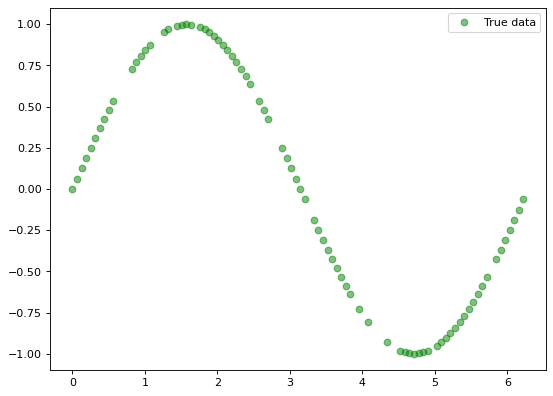

In [93]:
plot_performance(x_train, y_train)

In [94]:
# TRANING MODEL
x_epochs = [i for i in range(num_epochs)]
y_loss = []
for epoch in range(num_epochs):
    for (input, output) in (zip(x_train, y_train)):
        # if torch.cuda.is_available():
        #     input = Variable(torch.from_numpy(input).cuda())
        #     output = Variable(torch.from_numpy(output).cuda())
        # else:
        input = Variable(torch.from_numpy(input))
        output = Variable(torch.from_numpy(output))
    
        adam_optimizer.zero_grad()
        res = model(input)
        loss = criterion(res, output)
        loss.backward()
        adam_optimizer.step()
    y_loss.append(loss)
    if epoch % 50 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

    

epoch 0, loss 0.9026389122009277
epoch 50, loss 0.09194817394018173
epoch 100, loss 0.058218494057655334
epoch 150, loss 0.010811196640133858
epoch 200, loss 0.003111048601567745
epoch 250, loss 0.0016527140978723764
epoch 300, loss 0.00024828381719999015
epoch 350, loss 2.357022458454594e-05
epoch 400, loss 1.8107026335201226e-05
epoch 450, loss 5.5191867431858554e-05
epoch 500, loss 0.0001034916058415547
epoch 550, loss 0.00013266847236081958
epoch 600, loss 0.0002164019097108394
epoch 650, loss 0.0004177076043561101
epoch 700, loss 0.0007030803826637566
epoch 750, loss 0.000981631688773632
epoch 800, loss 0.0011724393116310239
epoch 850, loss 0.0012090946547687054
epoch 900, loss 0.0011267802910879254
epoch 950, loss 0.0009419501293450594
epoch 1000, loss 0.0007461852510459721
epoch 1050, loss 0.0005891456385143101
epoch 1100, loss 0.00047690124483779073
epoch 1150, loss 0.00039437104715034366
epoch 1200, loss 0.00032910567824728787
epoch 1250, loss 0.00027577418950386345
epoch 1300

<Figure size 432x288 with 0 Axes>

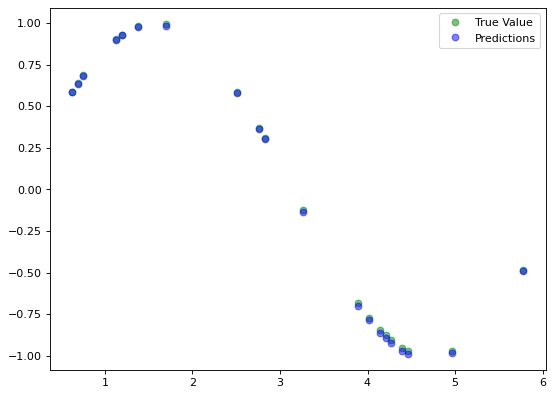

In [95]:
preds = []
for i in x_test:
    i = model(Variable(torch.from_numpy(i)))
    i = i.detach().numpy()
    preds.append(i)

plt.clf()
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(x_test, y_test, 'go', label='True Value', alpha=0.5)
plt.plot(x_test, preds, 'bo', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [99]:
type(y_loss[0])

torch.Tensor

In [104]:
y_loss_1 = [i.detach().numpy() for i in y_loss]

In [103]:
y_loss_1

[array(0.9026389, dtype=float32),
 array(0.7067051, dtype=float32),
 array(0.6066546, dtype=float32),
 array(0.52806866, dtype=float32),
 array(0.46022984, dtype=float32),
 array(0.40134156, dtype=float32),
 array(0.35071063, dtype=float32),
 array(0.30768576, dtype=float32),
 array(0.2715291, dtype=float32),
 array(0.24142845, dtype=float32),
 array(0.21654738, dtype=float32),
 array(0.19607969, dtype=float32),
 array(0.1792895, dtype=float32),
 array(0.16553195, dtype=float32),
 array(0.15425847, dtype=float32),
 array(0.14501083, dtype=float32),
 array(0.13741133, dtype=float32),
 array(0.13115172, dtype=float32),
 array(0.125981, dtype=float32),
 array(0.12169646, dtype=float32),
 array(0.1181328, dtype=float32),
 array(0.11515631, dtype=float32),
 array(0.11265858, dtype=float32),
 array(0.11055116, dtype=float32),
 array(0.10876266, dtype=float32),
 array(0.10723414, dtype=float32),
 array(0.10591782, dtype=float32),
 array(0.10477479, dtype=float32),
 array(0.10377263, dtype=flo

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

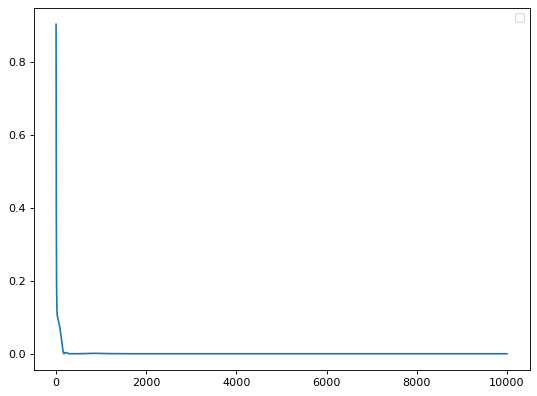

In [105]:
plt.clf()
plt.figure(figsize=(8, 6), dpi=80)
# plt.plot(x_test, y_test, 'go', label='', alpha=0.5)
plt.plot(x_epochs, y_loss_1)
plt.legend(loc='best')
plt.show()

In [123]:
def evaluate_model(test_input, test_output, model): 
    return


# evaluate_model(x_train, model)